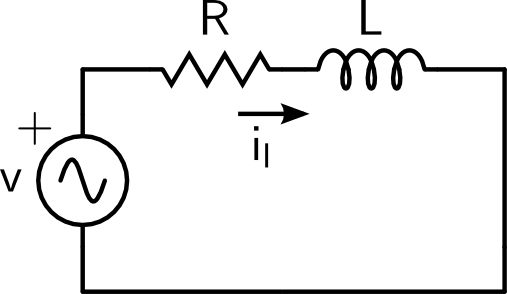

In [1]:
from IPython.display import Image
Image("./png/circuito_rl.png", width=300)



Applying Kirchhoff's voltage law (KVL):

$$\sf 0=v-Ri_l-L\frac{di_l}{dt}$$	

Previous equation can be written in the form $\sf  \frac{dx}{dt}  =f(x,u)$:

$$\sf \frac{di_l}{dt} =\frac{1}{L} \left(  v-Ri_l \right)$$


## Discretization 

The above system can be discretized using [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule_%28differential_equations%29) as follows,

 $$  \sf i_l^{i+1} = i_l^i + \frac{\Delta t}{2} \left( \frac{1}{L} \left(v^{i+1}-R i_l^{i+1} \right)+\frac{1}{L} \left(v^i-R i_l^i\right) \right)$$
 

## Optimization problem formulation

Supposed the following problem:

Define the voltage v for an interval of time between $\sf t=0\,s$ and $\sf t=100\,s$ in order to make $\sf i_l=10\,A$ at $\sf t=50\,s$ and $\sf i_l=0\,A$ at $\sf t=50\,s$, consuming the minimal energy and considering between $\sf -5 < v <5$.


minimize:
$$ \sf \int{vi_l} dt$$

subject to:

$$\sf \frac{di_l}{dt} =\frac{1}{L} \left(  v-Ri_l \right)$$
$$\sf i_l(t=50) = 10$$
$$\sf i_l(t=100) = 0$$
$$\sf -5 < v <5$$


Using a dizcretized system the problem can be formulated as follows:

minimize:
$$ \sf \sum{v^i i_l^i} $$

subject to:

 $$  \sf i_l^{i+1} = i_l^i + \frac{\Delta t}{2} \left( \frac{1}{L} \left(v^{i+1}-R i_l^{i+1} \right)+\frac{1}{L} \left(v^i-R i_l^i\right) \right)$$
$$\sf i_l^{i_50} = 10$$
$$\sf i_l^{i_100} = 0$$
$$\sf -5 < v^i <5$$


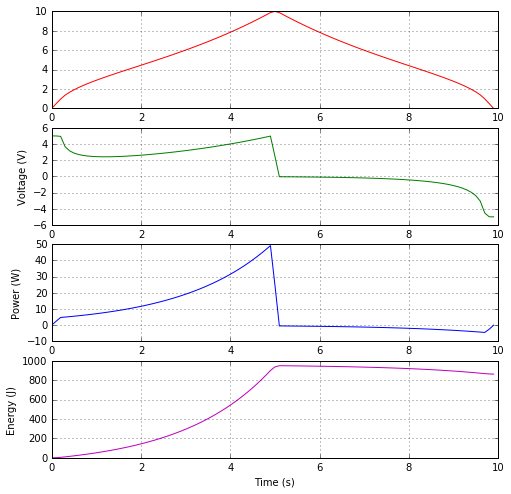

In [7]:
# Import of the pyomo module
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

# Creation of a Concrete Model
model = ConcreteModel()

idx_end = 100
Dt = 0.1
model.i = Set(initialize=range(idx_end), doc='tiempo')
model.j = Set(initialize=range(idx_end-1), doc='tiempo reducido')


model.i_l = Var(model.i, bounds=(0.0,None), doc='current')
model.v = Var(model.i, bounds=(-5,5), doc='voltage')

R =0.4
L=1.0

def con(model, i):
    return model.i_l[i+1] == model.i_l[i] + Dt*0.5*(1/L*(model.v[i+1]-R*model.i_l[i+1])+1/L*(model.v[i]-0.1*model.i_l[i]))
model.demand = Constraint(model.j, rule=con, doc='restr')

def con_desired_1(model):
    return model.i_l[50] == 10
model.desired1 = Constraint(rule=con_desired_1, doc='restr')

def con_desired_2(model):
    return model.i_l[99] == 0
model.desired2 = Constraint(rule=con_desired_2, doc='restr')

def initial(model):
    return model.i_l[0] == 0
model.initial = Constraint(rule=initial, doc='initial value')

def objective_rule(model):
    e = 0
    for i in range(100):
        p = model.v[i]*model.i_l[i]
        

        e +=(p)**2
    
    return  e
model.objective = Objective(rule=objective_rule, sense=minimize, doc='Define objective function')


from pyomo.opt import SolverFactory
import pyomo.environ
opt = SolverFactory("ipopt")
results = opt.solve(model)

t = np.array([item for item in model.i_l.get_values()])*Dt
i_l = np.array([item for item in model.i_l.get_values().values()])
v = np.array([item for item in model.v.get_values().values()])

fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=4)   # creates a figure with one axe
fig.set_size_inches(8,8)
p = v*i_l
e = integrate.cumtrapz(p, initial=0)

ax0.plot(t,i_l, 'r')
ax1.plot(t,v, 'g', lw=1)
ax2.plot(t,p, 'b', lw=1)
ax3.plot(t,e, 'm', lw=1)
#ax1.plot(t,v_1)
#ax1.plot(t,v_2)
#ax1.plot(t,v_3)


ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('Power (W)')
ax3.set_ylabel('Energy (J)')

ax3.set_xlabel('Time (s)')


ax0.grid(True)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

plt.show()

 $$  \sf i_l^{i+1} = i_l^i + \frac{\Delta t}{2} \left( \frac{1}{L} \left(v^{i+1}-R i_l^{i+1} \right)+\frac{1}{L} \left(v^i-R i_l^i\right) \right)$$


In [3]:
# Import of the pyomo module
from pyomo.environ import *
import numpy as np
import matplotlib.pyplot as plt

# Creation of a Concrete Model
model = ConcreteModel()

idx_end = 100
Dt = 0.1
model.i = Set(initialize=range(idx_end), doc='tiempo')
model.j = Set(initialize=range(idx_end-1), doc='tiempo reducido')


model.x = Var(model.i, bounds=(0.0,None), doc='current')
model.v = Var(model.i, bounds=(-5,5), doc='voltage')


def con(model, i):
    return model.x[i+1] == model.x[i] + Dt*0.5*(1/1.0*(model.v[i+1]-0.1*model.x[i+1])+1/1.0*(model.v[i]-0.1*model.x[i]))
model.demand = Constraint(model.j, rule=con, doc='restr')

def con_desired_1(model):
    return model.x[50] == 10
model.desired1 = Constraint(rule=con_desired_1, doc='restr')

def con_desired_2(model):
    return model.x[99] == 5
model.desired2 = Constraint(rule=con_desired_2, doc='restr')

def initial(model):
    return model.x[0] == 0
model.initial = Constraint(rule=initial, doc='initial value')

def objective_rule(model):
    e = 0
    for i in range(100):
        e += (model.v[i]*model.x[i])**2 + 10*model.x[i]**2
    
    return  e
model.objective = Objective(rule=objective_rule, sense=minimize, doc='Define objective function')


from pyomo.opt import SolverFactory
import pyomo.environ
opt = SolverFactory("ipopt")
results = opt.solve(model)

t = np.array([item for item in model.x.get_values()])*1.0
x = np.array([item for item in model.x.get_values().values()])
v = np.array([item for item in model.v.get_values().values()])

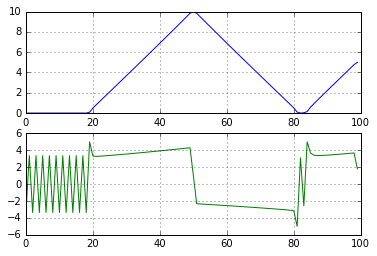

In [4]:
fig, (ax0,ax1) = plt.subplots(nrows=2)   # creates a figure with one axe

ax0.plot(t,x)
ax1.plot(t,v, 'g', lw=1)
#ax1.plot(t,v_1)
#ax1.plot(t,v_2)
#ax1.plot(t,v_3)

ax0.grid(True)
ax1.grid(True)

plt.show()


In [5]:
t

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99.])

In [6]:
results

{'Problem': [{'Upper bound': inf, 'Number of constraints': 102, 'Number of objectives': 1, 'Sense': 'unknown', 'Number of variables': 200, 'Lower bound': -inf}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])], 'Solver': [{'Status': 'ok', 'Error rc': 0, 'Termination condition': 'optimal', 'Id': 0, 'Message': 'Ipopt 3.7.1\\x3a Optimal Solution Found', 'Time': 0.032860755920410156}]}